Mounting Dataset And Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#importing Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from nltk.corpus import stopwords
import string
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#reading data
df=pd.read_csv("/content/gdrive/MyDrive/Dataset/Combined_News_DJIA.csv")

MODEL 1.2

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

In [ ]:
#df = df.drop(['Date'], axis=1)
df.head()

Combining all news into one coloumn


In [ ]:
df['combined'] = df[df.columns[2:]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)

In [ ]:
a=df['combined']
a[0], df['Label']

In [ ]:
columns_2 = ['Top1','Top2','Top3', 'Top4', 'Top5','Top6', 'Top7', 'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23','Top24', 'Top25']
df = df.drop(columns_2, axis=1)
df.head()

PLotting Labels

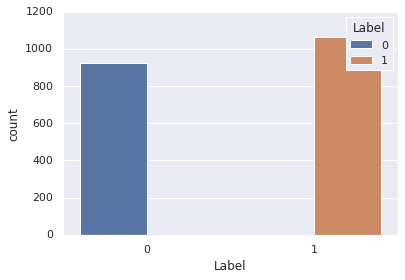

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()

ax = sns.countplot(x='Label', hue='Label', data=df)

MODEL 1.1

In [ ]:
x=df['combined']

In [ ]:
y=df['Label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state= 0)

In [ ]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.20,random_state= 0,shuffle=False)

Setting up transformers


In [ ]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 12.0 MB/s 
     |████████████████████████████████| 596 kB 42.7 MB/s 
     |████████████████████████████████| 3.3 MB 53.0 MB/s 
     |████████████████████████████████| 895 kB 43.2 MB/s 
     |████████████████████████████████| 61 kB 505 kB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
bert_model = TFBertModel.from_pretrained('bert-base-cased')
bert_model.trainable = False

tokenizer_in = tokenizer(corpus, padding=True, truncation=True, max_length=hparams["max_sequence_length"],
return_tensors="tf")

input_ids = tokenizer_in.input_ids
attention_masks = tokenizer_in.attention_mask
token_type_ids = tokenizer_in.token_type_ids

input_ids_in = Input(shape=hparams["max_sequence_length"], dtype=tf.int32, name='input_ids')
input_masks_in = Input(shape=hparams["max_sequence_length"], dtype=tf.int32, name='attention_masks')
token_type_ids_in = Input(shape=hparams["max_sequence_length"], dtype=tf.int32, name='token_type_ids')

embedding_layer = bert_model(input_ids_in, attention_mask = input_masks_in)
sequence_output = embedding_layer.last_hidden_state

In [ ]:
model.summary()

Converting Train Test dataframes to TENSORS

###Below this is previous model

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
#Train and Test
def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN):
  train_InputExamples = train.apply(lambda x: InputExample(guid=None,
                                                          text_a = x[DATA_COLUMN],
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

  validation_InputExamples = test.apply(lambda x: InputExample(guid=None,
                                                          text_a = x[DATA_COLUMN],
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

  return train_InputExamples, validation_InputExamples

  train_InputExamples, validation_InputExamples = convert_data_to_examples(train,
                                                                           test,
                                                                           'DATA_COLUMN',
                                                                           'LABEL_COLUMN')
# Here transformation is taking place
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = [] # -> will hold InputFeatures to be converted later
    for e in examples:
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            padding='longest', # pads to the right by default
            truncation=True
        )
        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],input_dict["token_type_ids"], input_dict['attention_mask'])
        features.append(InputFeatures(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label))
    def gen():
        for f in features:
            yield ({"input_ids": f.input_ids,"attention_mask": f.attention_mask,"token_type_ids": f.token_type_ids,},f.label,)

    return tf.data.Dataset.from_generator(gen,({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
              ({"input_ids": tf.TensorShape([None]),"attention_mask": tf.TensorShape([None]),"token_type_ids": tf.TensorShape([None]),},tf.TensorShape([]),),)
DATA_COLUMN = 'combined'
LABEL_COLUMN = 'Label'

Calling the model

In [ ]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
print(train_data)
train_data = train_data.shuffle(100).batch(32).repeat(2)
print(train_data)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(32)

DATA_COLUMN = 'combined'
LABEL_COLUMN = 'Label'

<FlatMapDataset shapes: ({input_ids: (None,), attention_mask: (None,), token_type_ids: (None,)}, ()), types: ({input_ids: tf.int32, attention_mask: tf.int32, token_type_ids: tf.int32}, tf.int64)>
<RepeatDataset shapes: ({input_ids: (None, None), attention_mask: (None, None), token_type_ids: (None, None)}, (None,)), types: ({input_ids: tf.int32, attention_mask: tf.int32, token_type_ids: tf.int32}, tf.int64)>


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

#tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_data, epochs=15, validation_data=validation_data)

Epoch 1/15
100/100 [==============================] - 186s 2s/step - loss: 0.6974 - accuracy: 0.5230 - val_loss: 0.7059 - val_accuracy: 0.5075
Epoch 2/15
100/100 [==============================] - 153s 2s/step - loss: 0.6968 - accuracy: 0.5287 - val_loss: 0.7006 - val_accuracy: 0.5075
Epoch 3/15
100/100 [==============================] - 153s 2s/step - loss: 0.6358 - accuracy: 0.6152 - val_loss: 0.7436 - val_accuracy: 0.5402
Epoch 4/15
100/100 [==============================] - 153s 2s/step - loss: 0.4831 - accuracy: 0.7352 - val_loss: 1.8614 - val_accuracy: 0.5176
Epoch 5/15
100/100 [==============================] - 153s 2s/step - loss: 0.3166 - accuracy: 0.8419 - val_loss: 2.1144 - val_accuracy: 0.5151
Epoch 6/15
100/100 [==============================] - 153s 2s/step - loss: 0.1150 - accuracy: 0.9515 - val_loss: 2.3542 - val_accuracy: 0.5226
Epoch 7/15
100/100 [==============================] - 153s 2s/step - loss: 0.0354 - accuracy: 0.9890 - val_loss: 3.0810 - val_accuracy: 0.5251

In [ ]:
validation_data

<BatchDataset shapes: ({input_ids: (None, None), attention_mask: (None, None), token_type_ids: (None, None)}, (None,)), types: ({input_ids: tf.int32, attention_mask: tf.int32, token_type_ids: tf.int32}, tf.int64)>

In [ ]:
model.evaluate(validation_data)

13/13 [==============================] - 7s 492ms/step - loss: 3.4029 - accuracy: 0.5176


[3.4029436111450195, 0.5175879597663879]

Testing with sample inputs

In [ ]:
pred_sentences = ['Stocks are rising above US put sanctions on IRAN amid nuclear attack Russia downs a fighter jet of georgia']

Using a SOFTMAX Layer and argmax

In [ ]:
df

,Date,Label,combined
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou..."
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...
4,2008-08-14,1,b'All the experts admit that we should legalis...
...,...,...,...
1984,2016-06-27,0,Barclays and RBS shares suspended from trading...
1985,2016-06-28,1,"2,500 Scientists To Australia: If You Want To ..."
1986,2016-06-29,1,"Explosion At Airport In Istanbul,Yemeni former..."
1987,2016-06-30,1,Jamaica proposes marijuana dispensers for tour...


In [ ]:
a=df['combined'][1987]

In [ ]:
a="Wow this is great "

In [ ]:
batch = tokenizer(a, max_length=128, padding=True, truncation=True, return_tensors='tf')
outputs = model(batch)
print("Output is : ",outputs[0])
predictions = tf.nn.softmax(outputs[0], axis=-1)
print("Predictions:",predictions)
labels = ['Negative','Positive']
label = tf.argmax(predictions, axis=1)
print("First label is : ",label)
label = label.numpy()
print("Label 2 is: ",label)
for i in range(len(pred_sentences)):
  print(labels[label[i]])
  print(a, ": \n", labels[label[i]])

Output is :  tf.Tensor([[ 0.74042904 -0.614391  ]], shape=(1, 2), dtype=float32)
Predictions: tf.Tensor([[0.79491657 0.20508349]], shape=(1, 2), dtype=float32)
First label is :  tf.Tensor([0], shape=(1,), dtype=int64)
Label 2 is:  [0]
Negative
Wow this is great  : 
 Negative
